In [12]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [13]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [14]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [15]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [16]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [17]:
last_date = '2017-08-23'

In [18]:
df = pd.read_sql_query(session.query(Measurement).filter(Measurement.date >= '2016-08-23').statement,session.bind).sort_values('date').reset_index()

In [19]:
df=df.set_index(df.date)


<IPython.core.display.Javascript object>


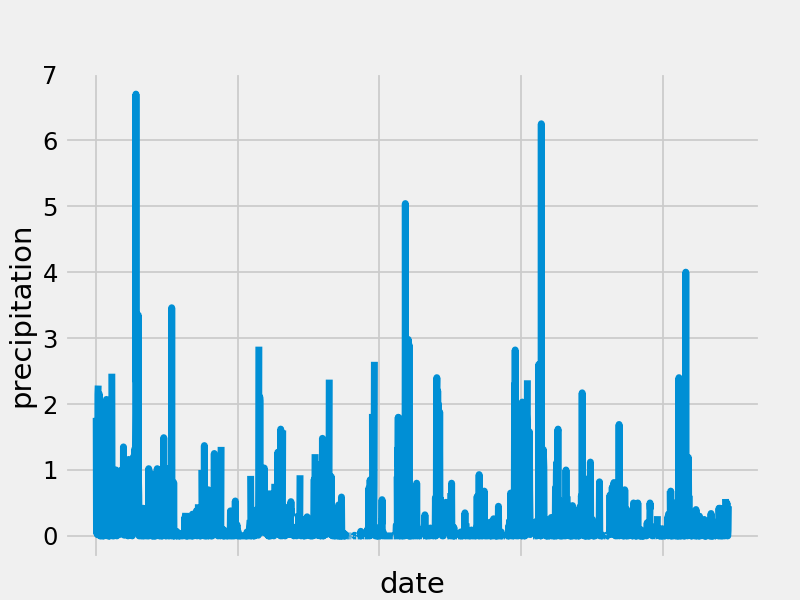

In [20]:
df.prcp.plot()
plt.ylabel('precipitation')
plt.show()

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_prcp.describe()

NameError: name 'df_prcp' is not defined

In [ ]:
df.head()

In [ ]:
# How many stations are available in this dataset?
df.station.nunique()

In [ ]:
# What are the most active stations?
# List the stations and the counts in descending order.

active_stations = df.station.value_counts().to_frame()
active_stations

In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

busy_station = df.loc[df['station'] == 'USC00519397']
busy_station.tobs.mean()

In [79]:
busy_station.tobs.max()

87.0

In [80]:
busy_station.tobs.min()

60.0

In [82]:
station_list = {}
station_list['data']=[]

for row in session.query(Station):
    station_list['data'].append(
    {"id":row.id,
     "station": row.station,
     "lat":row.latitude,
     "lng":row.longitude,
     "elev": row.elevation
        
    })

In [83]:
station_list

{'data': [{'id': 1,
   'station': 'USC00519397',
   'lat': 21.2716,
   'lng': -157.8168,
   'elev': 3.0},
  {'id': 2,
   'station': 'USC00513117',
   'lat': 21.4234,
   'lng': -157.8015,
   'elev': 14.6},
  {'id': 3,
   'station': 'USC00514830',
   'lat': 21.5213,
   'lng': -157.8374,
   'elev': 7.0},
  {'id': 4,
   'station': 'USC00517948',
   'lat': 21.3934,
   'lng': -157.9751,
   'elev': 11.9},
  {'id': 5,
   'station': 'USC00518838',
   'lat': 21.4992,
   'lng': -158.0111,
   'elev': 306.6},
  {'id': 6,
   'station': 'USC00519523',
   'lat': 21.33556,
   'lng': -157.71139,
   'elev': 19.5},
  {'id': 7,
   'station': 'USC00519281',
   'lat': 21.45167,
   'lng': -157.84888999999998,
   'elev': 32.9},
  {'id': 8,
   'station': 'USC00511918',
   'lat': 21.3152,
   'lng': -157.9992,
   'elev': 0.9},
  {'id': 9,
   'station': 'USC00516128',
   'lat': 21.3331,
   'lng': -157.8025,
   'elev': 152.4}]}

In [ ]:
* Design a query to retrieve the last 12 months of temperature observation data (tobs).

  * Filter by the station with the highest number of observations.

  * Plot the results as a histogram with `bins=12`.

`/api/v1.0/precipitation`

  * Query for the dates and temperature observations from the last year.

  * Convert the query results to a Dictionary using `date` as the key and `tobs` as the value.

  * Return the JSON representation of your dictionary.

* `/api/v1.0/stations`

  * Return a JSON list of stations from the dataset.

* `/api/v1.0/tobs`

  * Return a JSON list of Temperature Observations (tobs) for the previous year

* `/api/v1.0/<start>` and `/api/v1.0/<start>/<end>`

  * Return a JSON list of the minimum temperature, the average temperature, and the max temperature for a given start or start-end range.

  * When given the start only, calculate `TMIN`, `TAVG`, and `TMAX` for all dates greater than and equal to the start date.

  * When given the start and the end date, calculate the `TMIN`, `TAVG`, and `TMAX` for dates between the start and end date inclusive.


In [84]:
def start(start_date):
    
    weather_rows = engine.execute("""
    SELECT
        round(avg(m.tobs), 2) as avg_temp,
        round(min(m.tobs), 2) as min_temp,
        round(max(m.tobs), 2) as max_temp
    FROM Measurement m
    Where m.date >= '{}'""".format(start_date)).fetchall()
    
    return {'data':[dict(x) for x in weather_rows]}

In [85]:
start('2016-08-20')

{'data': [{'avg_temp': 74.62, 'min_temp': 58.0, 'max_temp': 87.0}]}

In [ ]:
return jsonify({'data':[dict(x) for x in weather_rows]})

In [161]:
def station_func():
    stations = engine.execute("""
    SELECT
    s.*
    FROM Station s""").fetchall()
    return stations

In [162]:
s = station_func()

In [169]:
{'data':[dict(x) for x in s]}

{'data': [{'id': 1,
   'station': 'USC00519397',
   'name': 'WAIKIKI 717.2, HI US',
   'latitude': 21.2716,
   'longitude': -157.8168,
   'elevation': 3.0},
  {'id': 2,
   'station': 'USC00513117',
   'name': 'KANEOHE 838.1, HI US',
   'latitude': 21.4234,
   'longitude': -157.8015,
   'elevation': 14.6},
  {'id': 3,
   'station': 'USC00514830',
   'name': 'KUALOA RANCH HEADQUARTERS 886.9, HI US',
   'latitude': 21.5213,
   'longitude': -157.8374,
   'elevation': 7.0},
  {'id': 4,
   'station': 'USC00517948',
   'name': 'PEARL CITY, HI US',
   'latitude': 21.3934,
   'longitude': -157.9751,
   'elevation': 11.9},
  {'id': 5,
   'station': 'USC00518838',
   'name': 'UPPER WAHIAWA 874.3, HI US',
   'latitude': 21.4992,
   'longitude': -158.0111,
   'elevation': 306.6},
  {'id': 6,
   'station': 'USC00519523',
   'name': 'WAIMANALO EXPERIMENTAL FARM, HI US',
   'latitude': 21.33556,
   'longitude': -157.71139,
   'elevation': 19.5},
  {'id': 7,
   'station': 'USC00519281',
   'name': 'WAI

In [167]:
engine.execute("""
    SELECT
    s.*
    FROM Station s""").fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]